# Machine Learning Case Study:
## Wisconsin Breast Cancer data set Classification with Stochastic Gradient Descent

### 1	Prepare and analyse the dataset
 
1.1	Load the Wisconsin breast cancer data set from the scikit-learn sample data collection. Read the full documentation: https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset. 
 
![Microscopy image of cells and cell nuclei](https://raw.githubusercontent.com/MarkStephens060482/EditREADME/main/Screenshot%202023-05-16%20143152.jpg)

Figure 1:This image shows an example image of a tissue sample obtained by fine needle aspiration. A more detailed description of the parameters can be found here: https://minds.wisconsin.edu/bitstream/1793/59692/1/TR1131.pdf

In [1]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True, as_frame=True)

C:\Users\08632717\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


***
1.2	Summarise the dataset with pandas functions `info()` and `describe()`.

In [2]:
print(X.info())
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There are 30 features of continuous numeric data type with 569 instances and no missing values. A significant proportion of the features have a mean value greater than the median and are positively skewed in distribution.

***
1.3 Briefly describe in your own words what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset in scikit-learn, the paper of the original collectors of the data set, and the example image in Figure 1. 
* Scikit-learn: https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
* Paper: https://minds.wisconsin.edu/bitstream/1793/59692/1/TR1131.pdf

Answer:
The computer vision diagnostic system extracts 10 features from the active contour model of the cell nuclei boundaries. The features are as follows:

|Feature|Description|Data Type|
|:-----:|:---------:|:-------:|
|Radius|  The average length of the radial line segment from the centroid to the increment points on the boundary |Float|
|Perimeter|  The total distance between incremental contour boundary segments |Float|
|Area| The area space of the nucleus as defined by number of pixels of a given size on the inside of contour boundary  |Float|
|Compactness| The compactness is a derived quantity given by ${perimeter^{2}\over area} $ and is a dimensionaless quantity.  |Float|
|Smoothness| The smoothness of a contour boundary of a nucleus is determined by the difference of the radial length and mean length of surrounding lines.|Float|
|Concavity| A measure of small indentations in the cell nucleus by quantifying the proportion of the contour boundary of the cell that lies on the inside of chords constructed between alternating boundary points.|Float|
|Concave Points| The count of contour boundary sections that form indentations, that is, they lie on the inside of chords constructed between alternating boundary contour points.|Float|
|Symmetry| The difference in the length of the segments of chords that are divided by the perpendicular major axis, where the major axis is the longest possible chord that passes through the center.|  Float|
|Fractal Dimension| Determined as the negative slope of the curve produced by estimating the perimeter of the cell nucleus for varying size of measuring unit.|Float|
|Texture| The variance of the gray scale intensities in the image pixels of the cell nucleus.|Float|


***
1.4 How are the classes Malignant (cancer) and Benign (healthy) encoded in the dataset? What is the default assumption for label coding of sklearn.metrics.precision_score? How will you handle the label coding?

Answer: 
The class distribution as taken from the data set description is: 212 - Malignant, 357 - Benign

In [3]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

The target classes are encoded as 1 for Benign tumors and a 0 for Malignant tumors. The default assumption for label coding for *sklearn.metrics.precision_score()* is that the positive label is a 1. For the positive label to be a 'Malignant' tumor, the encoding needs to be inverted.

In [4]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = 1
    else:
        y[i] = 0
y.value_counts()

0    357
1    212
Name: target, dtype: int64

***
1.5	Plot histograms of all of the 30 features, using in each diagram two distributions, one for each class. Use 3 figures with 10 subplots each.

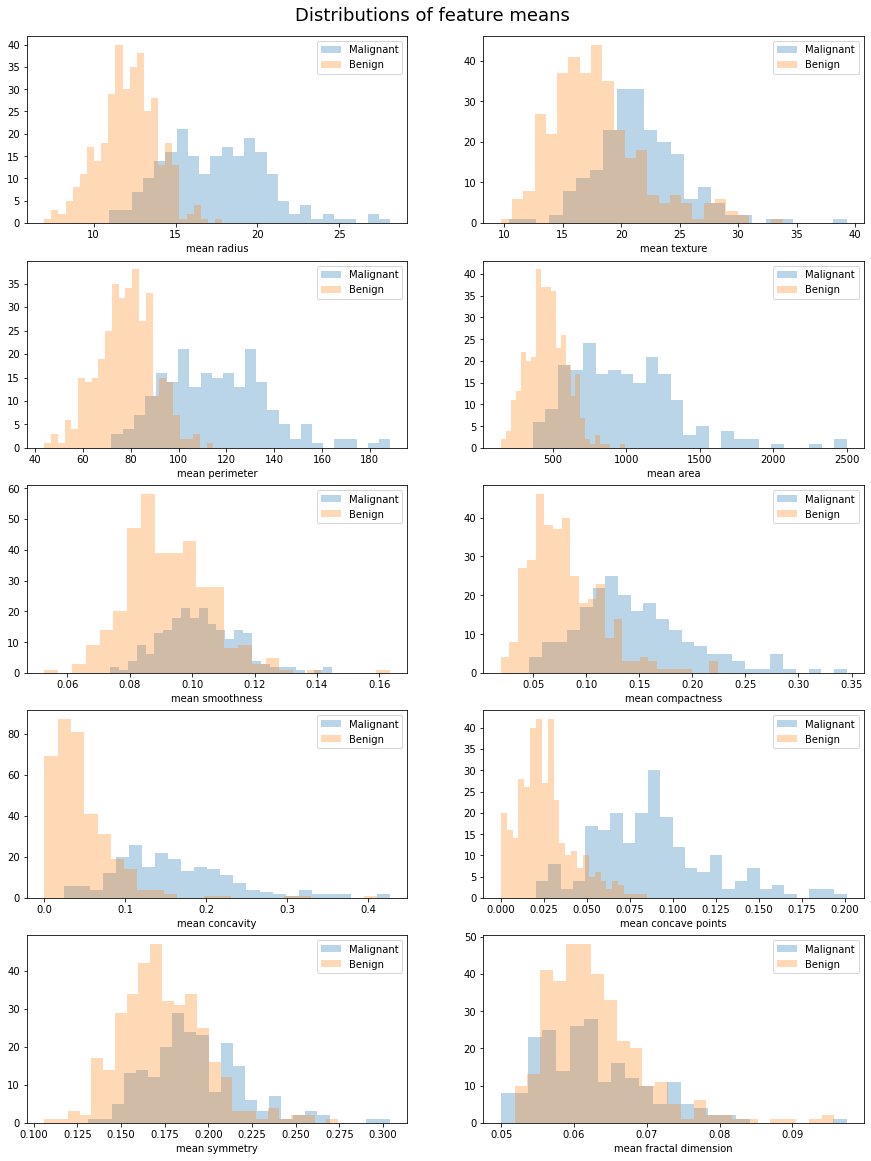

In [5]:
# Histograms of all of the 30 features
import matplotlib.pyplot as plt
import numpy as np

data = X.copy()
# include the target variable to the data set
data['Target'] = y
# initialise the figure
fig,axs = plt.subplots(5,2,figsize = (15,20))
plt.suptitle("Distributions of feature means", y=0.9,size = 18) 
axs = np.ravel(axs)
features = data.columns
for i in range(len(axs)):
    axs[i].hist(data[data['Target'] == 1][features[i]],bins = 25,alpha=0.3, label = 'Malignant')
    axs[i].hist(data[data['Target'] == 0][features[i]],bins = 25,alpha=0.3, label = 'Benign')
    axs[i].set_xlabel(features[i])
    axs[i].legend()

The distribution of the sample means of the features are approximately normal with positive skew, and most features possess outliers. The features of significant seperation in the different classes are mean radius, mean perimeter, mean area and mean concave points. Mean concavity and mean compactness also exhibit some seperation across classes.

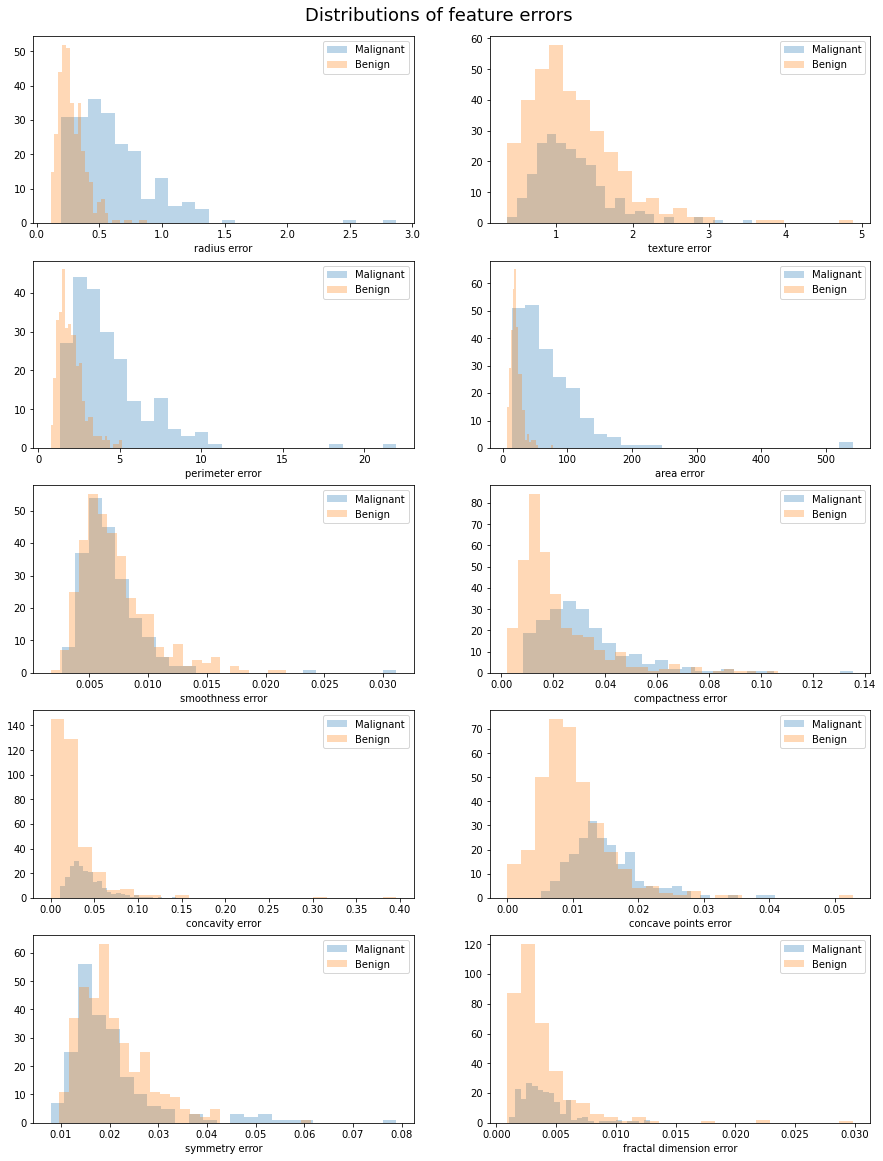

In [6]:
# initialise the figure 2
fig,axs = plt.subplots(5,2,figsize = (15,20))
plt.suptitle("Distributions of feature errors", y=0.9,size = 18) 
axs = np.ravel(axs)
features = data.columns
for i in range(len(axs)):
    axs[i].hist(data[data['Target'] == 1][features[i+10]],bins = 25,alpha=0.3, label = 'Malignant')
    axs[i].hist(data[data['Target'] == 0][features[i+10]],bins = 25,alpha=0.3, label = 'Benign')
    axs[i].set_xlabel(features[i+10])
    axs[i].legend()

The distributions of the standard error of the mean of the features are predominanatly positively skewed with outliers. The standard error in the mean of radius, perimeter and area exhibit significant seperation.

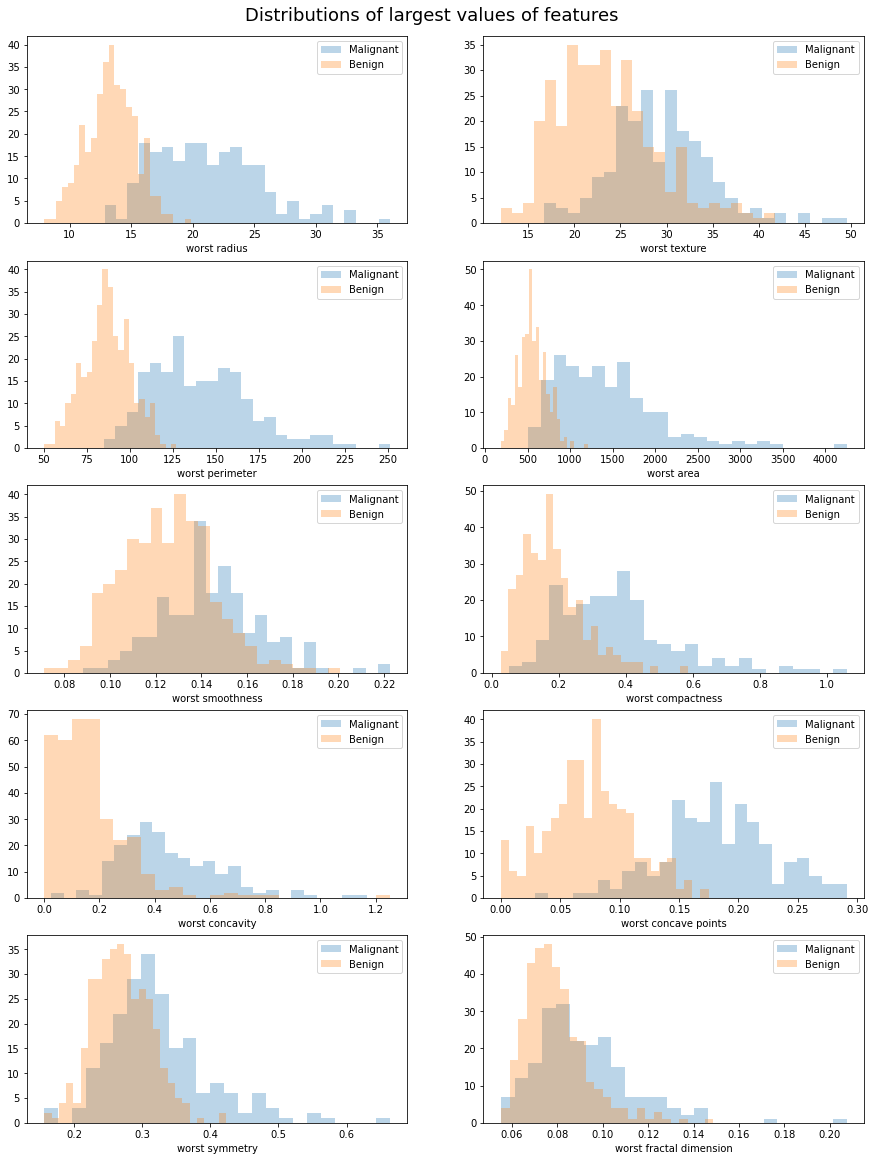

In [7]:
# initialise the figure 3
fig,axs = plt.subplots(5,2,figsize = (15,20))
plt.suptitle("Distributions of largest values of features", y=0.9,size = 18) 
axs = np.ravel(axs)

for i in range(len(axs)):
    axs[i].hist(data[data['Target'] == 1][features[i+20]],bins = 25,alpha=0.3, label = 'Malignant')
    axs[i].hist(data[data['Target'] == 0][features[i+20]],bins = 25,alpha=0.3, label = 'Benign')
    axs[i].set_xlabel(features[i+20])
    axs[i].legend()

The worst values of the features exhibit considerable seperation across classes for radius, perimeter, area and concave points. Also, other well seperated features are the worst values for compactness and concavity, though to a lesser extent. The distributions are approximately normal with significant postive skew and outliers.

***
1.6	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10. The ROC curve of one feature can be calculated by moving a class decision threshold value across the value range of the feature.

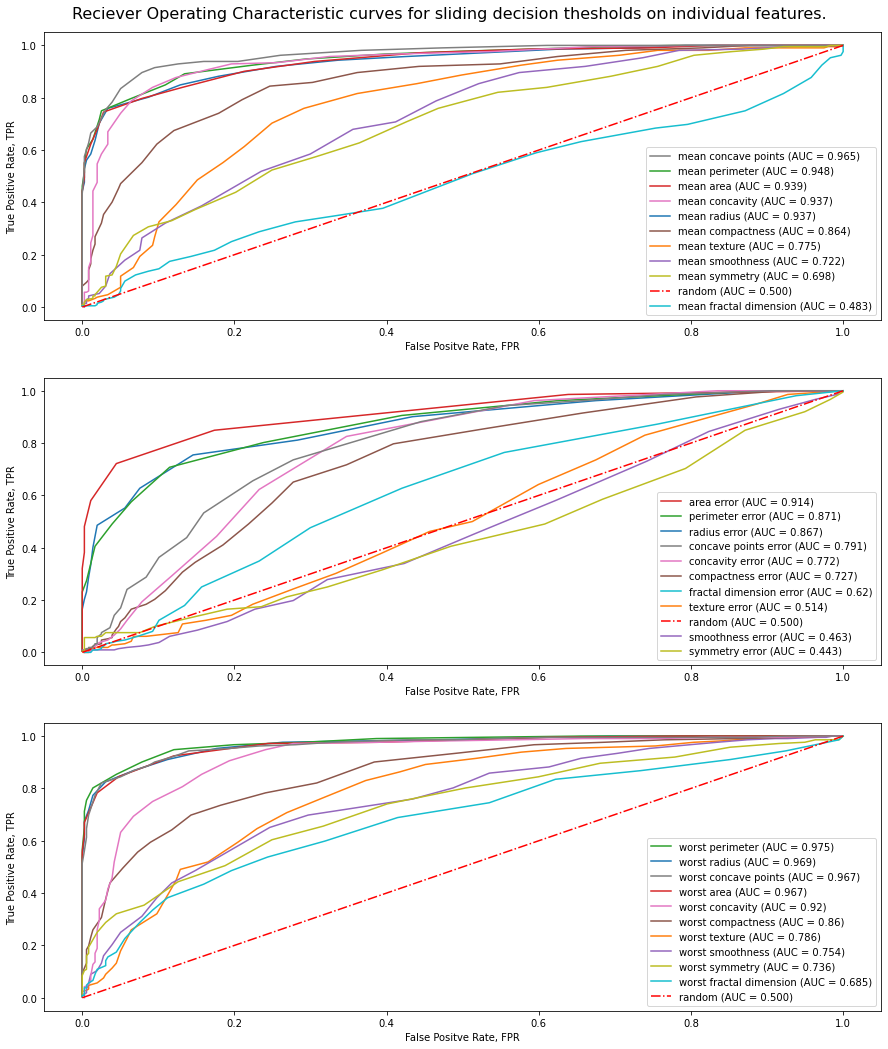

In [8]:
import pandas as pd
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

def featureROC(X_feature,y,steps):
    '''
    Returns an receiver operating characteristic array of values to produce a curve for an individual feature, where the decision function 
    is a sliding theshold across the range of the feature.
    Arguments:
    X_feature: The data set of an individual feature.
    y: the class variable.
    steps: the number of intervals decision function is evaluated.
    
    output:
    Returns a (step, 2) array of True Positive Rates and False Positive Rates.
    '''
    # Initialise result data structure
    output = np.zeros((steps,2))
    # define the interval of the decision function threshold.    
    interval = (X_feature.max() - X_feature.min())/steps
    # loop through each step
    for i in range(steps):
        # initialise a y prediction data structure
        y_pred = np.zeros(len(y))
        #define the decision threshold value for each step
        threshold = X_feature.min() + i * interval
        #loop through all values of the feature variable
        for j,value in enumerate(X_feature.values):
            #compare value to threshold
            if (value >= threshold).bool():
                #if value exceeds threshold then decide the predicted class to be positive (1).
                y_pred[j] = 1
        # calculating the confusion matrix
        tn,fp,fn,tp = confusion_matrix(y,y_pred).ravel()
        #calculate the False Positive Rate
        FPR = fp/(fp + tn)
        #calculate the True Positive Rate, same as recall
        TPR = tp/(tp + fn)
        #append values of FPR and TPR to output array
        output[i] = [FPR,TPR]
        
    return output

#intitialise the figure
fig,axs = plt.subplots(3,1,figsize = (15,18))
# set the figure title
plt.suptitle("Reciever Operating Characteristic curves for sliding decision thesholds on individual features.", y=0.9,size = 16) 

# naming the features
features = X.columns
#Return a contiguous flattened array of axis objects.
axs = np.ravel(axs)

#define steps of thresold values
steps = 50
# produce featureROC output for each feature of the dataset
for i in range(3):
    auclist = []
    for j in range(10):
        # produce ROC values for feature
        roc_values = featureROC(X.iloc[:,i*10+j:i*10+j+1],y,steps)
        #convert the FPR and TPR values to a dataframe
        roc_dataframe = pd.DataFrame(roc_values,columns=['FPR','TPR'])
        #Determine the AUC
        roc_auc = round(auc(np.array(roc_dataframe['FPR']),np.array(roc_dataframe['TPR'])),3)
        #Add values of ROC_AUC to a list
        auclist.append(roc_auc)
        #plot the ROC curve for the feature.
        axs[i].plot('FPR','TPR',data=roc_dataframe,label=f'{features[i*10+j]} (AUC = {roc_auc})')
    #plot the ROC for random classifier
    axs[i].plot([0,1],[0,1],'r-.',label = 'random (AUC = 0.500)')
    #Add approximated values of ROC_AUC to a list
    auclist.append(0.500)
    # return the list of indices for sorting a list
    order = list(np.argsort(auclist))
    # reverse the order of sorting to descendiong order.
    order.reverse()
    #get handles and labels
    handles, labels = axs[i].get_legend_handles_labels()
    #add legend to plot
    axs[i].legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    axs[i].set_xlabel('False Positve Rate, FPR')
    axs[i].set_ylabel('True Positive Rate, TPR')

***
1.7 Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

Answer:
The five features that have the greatest area under the curve of the ROC graph (AUC_ROC) are *worst perimeter*, *worst radius*, *worst concave points*, *worst area* and *mean concave points* with values 0.975, 0.969, 0.967, 0.967 and 0.965 respectively. The features *worst perimeter*, *worst radius*, *worst concave points* and *mean concave points* exhibit clear seperation in distributions of classes as seen in histograms, while *worst area* show good seperation in distributions though to a lesser extent. 
The candidate top 5 features as identified from inspecting the exploratory data analysis visualisationare are:
1. *worst perimeter*
2. *worst radius*
3. *worst concave points*
4. *worst area*
5. *mean concave points*

In [9]:
candidate_top5_features = ['worst perimeter',
                           'worst radius',
                           'worst concave points',
                           'worst area',
                           'mean concave points']

***
1.8	Split the data set into a training set (80%) and a test set (20%) using `train_test_split` in sklearn. The test data will not be used until the final evaluation.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Seggregate data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40, shuffle=True, stratify=y)

print(f'The training set has {len(X_train)} observations and {len(X_train.columns)} features')
print(f'The testing set has {len(X_test)} observations and {len(X_test.columns)} features')

n_splits = 5
#n_repeats = 10

# initialise cross-validation data sets
#cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

The training set has 455 observations and 30 features
The testing set has 114 observations and 30 features


# 2	Train a regularised Stochastic Gradient Descent classifier

2.1	Create a stochastic gradient descent classifier object. Set the penalty to ’elasticnet’.

In [11]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='hinge', 
                           penalty='elasticnet', 
                           alpha=0.0001, 
                           l1_ratio=0.15, 
                           max_iter=1000, 
                           tol=0.0001, 
                           epsilon=0.1, 
                           class_weight='balanced',
                           learning_rate='optimal',
                           n_jobs=-1, 
                           random_state=40)

***
2.2 Explain in your own words what the parameter class_weight does. Set it to “balanced”.

Answer: The parameter *class_weight* assigns weights to classes in order to reduce biasing the model towards a particular class of a higher proportion during trtaining. By setting the parameter to 'balanced', a balanced class weights approach is employed  which accounts for the imbalance in the class frequencies by using the inverse proportion of class frequencies when training the classifier model. The class weights as determined by the sklearn package are as follows:

In [12]:
# Calculate weights using sklearn
from sklearn.utils import class_weight
classes = np.unique(y_train)
sklearn_weights = class_weight.compute_class_weight('balanced',classes = classes,y = y_train)

# The weights for the classes
print(f'The weights for the "benign" class is {sklearn_weights[0]:.3f}')
print(f'The weights for the "malignant" class is {sklearn_weights[1]:.3f}')

The weights for the "benign" class is 0.798
The weights for the "malignant" class is 1.338


***
2.3 Explain in your own words what the parameter learning_rate does and how the learning rate will be adjusted using the selection ‘optimal’. Set it to ‘optimal’.

Answer: Under Stochastic Gradient Descent model parameters are iteratively updated throughout the training process. The step size of each update of the model parameters is determined by the learning rate. At the initial steps of the training process the learning rate may be larger, however becomes smaller as  the model parameters approach the optimal value. The *'optimal'* setting for the learning rate schedule makes the values of the learning rate inversely proportional to the time step. The time step is similar to the number of iterations of the algorithm, and as the time step increases the learning rate decreases. The learning rate is also inversely proportional to the regularisation strength.

***
2.4	Build a pipeline including a `StandardScaler` object and the classifier object. Question: Explain what the standard scaler does and what would happen if we would not scale the data with it.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# feature standardisation preprocessing step
scaler = StandardScaler()

# construct pipeline of preprocessing step and model
pipeline = make_pipeline(scaler, classifier)

#unscaled_pipeline = make_pipeline(classifier)

Answer: The stadard scalar is a preprocessing step in the pipeline that centers the features of the training data to have a mean of zero and scales the values such that the standard deviation is 1. This is to ensure all features have a range of values that are on a comparable scale and so no one variable with a range of values of an order of magnitude greater than another will dominate in the training of the model. This is important particularly for Stochastic gradient descent with regularisation, which is sensitive to unscaled data.
If the data was not scaled, the regularisation will favour variables with values of larger magnitude and consider other variables with values of smaller magnitude as insignificant, irrespective of whether such variables explain the classes or not. This in turn would reduce the accuracy of the model and increase incidences of false predictions.  

***
2.5	Perform one grid search using five-fold cross validation (GridSearchCV) over values of alpha in the range of 0.001:0.001:0.1 and l1 ratio in the range of 0:0.1:1 using the training set.

In [14]:
from sklearn.model_selection import GridSearchCV

alpha_range = np.linspace(0.001,0.1,num = 100)
l1_ratio_range = np.linspace(0,1,num = 11)

#grid search parameters
param_grid = {'sgdclassifier__alpha':alpha_range,
          'sgdclassifier__l1_ratio':l1_ratio_range}

#gridsearch cross-validation
grid = GridSearchCV(pipeline,
                    param_grid,
                    scoring='accuracy',
                    n_jobs=-1,
                    refit=True,
                    cv=cv)

grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(class_weight='balanced',
                                                      n_jobs=-1,
                                                      penalty='elasticnet',
                                                      random_state=40,
                                                      tol=0.0001))]),
             n_jobs=-1,
             param_grid={'sgdclassifier__alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.00...
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
                         'sgdclassifier__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy')

In [15]:
new_line = '\n'
print(f'The best parameters are: {grid.best_params_} {new_line} giving a best accuracy score of {grid.best_score_: 0.4f}')

The best parameters are: {'sgdclassifier__alpha': 0.044000000000000004, 'sgdclassifier__l1_ratio': 0.5} 
 giving a best accuracy score of  0.9912


***
2.6	Display the mean test score (in attribute cv_results_ under 'mean_test_score') of all hyper parameter combinations (alpha and l1 ratio) in colour-coded diagram with alpha on the x-axis and l1 ratio on the y-axis. 

Describe in your own words the meaning of the alpha and l1 ratio and the hyper parameter value ranges that give high accuracy.

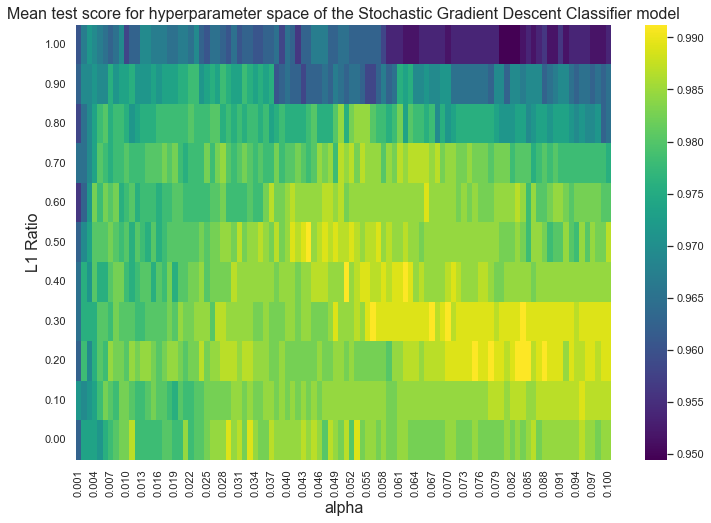

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,ScalarFormatter)

sns.set(style="darkgrid")
# express the  values from cross-validation results as a pivot table
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values='mean_test_score', 
                     index= 'param_sgdclassifier__l1_ratio',
                     columns='param_sgdclassifier__alpha')
# initialise the figure
fig, ax = plt.subplots(figsize=(12, 8))
# produce the figure as a heatmap  
ax = sns.heatmap(pvt,
                 annot=False,
                 cmap="viridis",
                 linecolor='white')

ax.set_xlabel("alpha",fontdict={'fontsize': 16} )
ax.set_ylabel("L1 Ratio",fontdict={'fontsize': 16})
ax.set_title("Mean test score for hyperparameter space of the Stochastic Gradient Descent Classifier model",fontdict={'fontsize': 16})
plt.gca().invert_yaxis()

#formatting and setting y tick labels
ylabels = [item.get_text() for item in ax.get_yticklabels()]
yticklabels =['%.2f' % float(y) for y in ylabels]

ax.set_yticklabels(yticklabels)

#formatting and setting x tick labels
xlabels = [item.get_text() for item in ax.get_xticklabels()]
xticklabels =['%.3f' % float(x) for x in xlabels]

ax.set_xticklabels(xticklabels)

plt.show()

Answer: The hyper parameter alpha, $\alpha$, is the regularisation strength and is a multiplying factor on the regularisation term of the loss function. This is the magnitude of applying a penalty to increase the size of model parameter values in order to reduce overfitting. A larger value of alpha value will penalise the optimisation function. The *L1_ratio* hyper parameter is the Elastic Net mixing ratio. It gives the proportion that the penalty term will contribute to the loss function. A value of 1 gives purely a L1 penalty while a value of 0 gives a L2 penalty. A value between 0 and 1 gives a mixure of both L2 and L2 penalty.
The ranges of the hyper parameters that returns a high accuracy score can be seen in the region with the brightest yellow. The parameter alpha ranges from approximately 0.04 to 0.07 as the L1_Ratio parameter ranges from approximates 0.3 up to 0.6. These ranges can return an accuracy score as high as approximately 0.99. 

***
# 3	Evaluate the classifier

3.1	Take the best estimator from above. Calculate the confusion matrix, precision and recall of the final classifier using the test set. 

Based on these metrics, what is the chance of failing to detect a sample with cancer (malignant)?

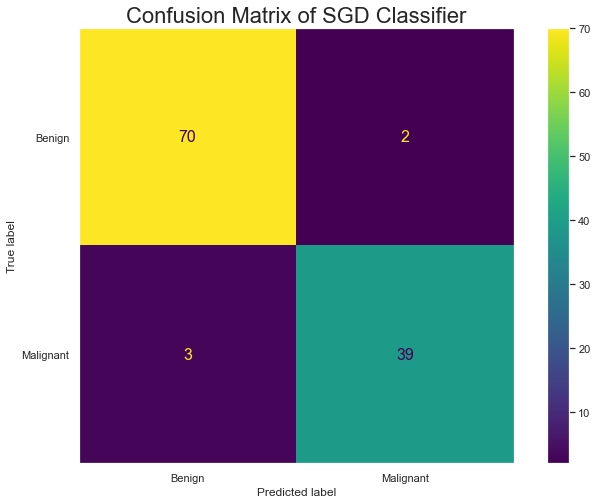

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# predictions of classes using the test data set.
pred_y = grid.predict(X_test)
# Evaluate the predictions by analysing the confusion matrix.
cm = confusion_matrix(y_test,pred_y)
labels = ['Benign','Malignant']
#Initialise the figure of the Confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))    
ax.grid(False)
#Set title and font size of the Confusion Matrix
plt.title("Confusion Matrix of SGD Classifier",{'fontsize': 22})
plt.rc('font', **{'size':16})

#Display confusion matrix from the predictions on the testing data set
ConfusionMatrixDisplay.from_predictions(y_test,pred_y,display_labels =labels,ax=ax )

Answer:The Confusion matrix shows that the classifier correctly predicted 39 cases of a malignant tumor and incorrectly predicted 3 cases as benign. The precision and recall of the classifier are given below: 

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'The precision of the classifier is {precision_score(y_test, pred_y): 0.3f}')
print(f'The recall of the classifier is {recall_score(y_test, pred_y): 0.3f}')

The precision of the classifier is  0.951
The recall of the classifier is  0.929


From these evaluation metrics, the chances of failing to detect a malignant samples is given by the false negative rate, which is given by  $1-recall$ and is as follows:

In [19]:
print(f'The chance of failing to detect a sample with cancer is{1 - recall_score(y_test, pred_y): 0.3f}')

The chance of failing to detect a sample with cancer is 0.071


***
3.2	Display the coefficients for all features in descending order (largest first) in a list including the feature names.

Do the top features match your top 5 features chosen based on the ROC curves? 

In [20]:
model_weights = pd.DataFrame(np.c_[grid.feature_names_in_,grid.best_estimator_[1].coef_[0]],columns=['feature','coefficient'])
model_weights = model_weights.sort_values(by = 'coefficient',ascending=False)
model_weights

,feature,coefficient
20,worst radius,0.367645
22,worst perimeter,0.363904
24,worst smoothness,0.321944
27,worst concave points,0.260644
23,worst area,0.247582
10,radius error,0.23424
21,worst texture,0.233714
0,mean radius,0.221136
3,mean area,0.190943
2,mean perimeter,0.188261


In [21]:
top_features_df = pd.DataFrame(np.c_[candidate_top5_features,model_weights.head(5)['feature']],
                               columns = ['candidate top 5 features','Actual top 5 features']) 


Answer: Four out of five top features of the linear classifier model were identified from observing their ROC curves and histograms of their distribution. The features *worst perimeter* and *worst radius* were initially identified as first and second most important from their ROC curves, and happen to be the second and first most important features respectively according to the coefficients of the model. *Worst smoothness* is regarded as the third most important feature for the classifier model, however was not previously identified in the top 5 features during the exploratory data analysis.  

***
3.3	Select the 5 features with the strongest coefficients. Make a figure with 5x5 subplots, where each row and column corresponds to one of the 5 features and the subplots are the 2D scatterplots of the data set using the two features of that row and column. Unambiguously label True Positives, True Negatives, False Positives and False Negatives using marker types and/or colours.

Text(0.5, 1.02, 'Pairplot of top 5 features with classification labels.')

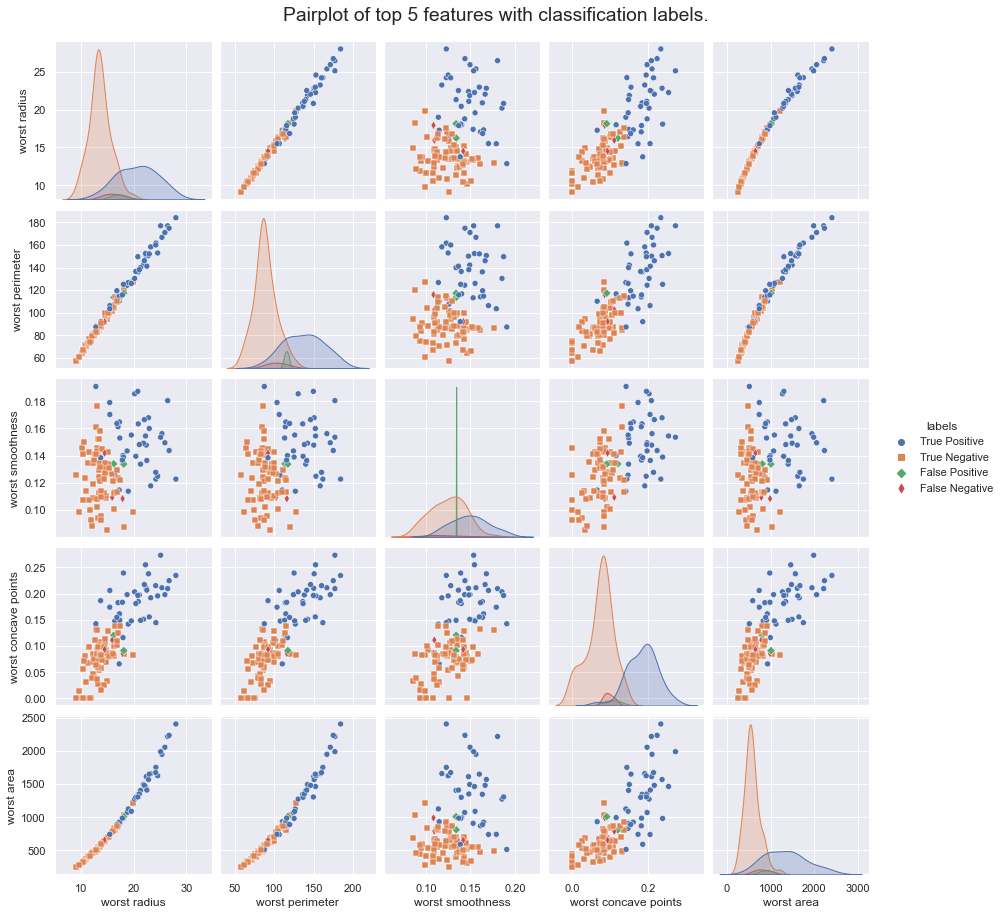

In [22]:
import seaborn as sns
#define a function that returns labels for classification outcomes.
def labeldata(truecolumn,predictcolumn):
    '''
    Returns classification outcome labels of True Positive (TP), False Negative (FN), False Positive (FP) and True Negative (TN) for
    each instance in a dataframe based on true class and predicted class columns.
    Arguements:
    truecolumn =  the column of the True class target variable.
    predictcolumn =  The column of the Predicted class variable.
    Returns:
    Label as a string
    '''
    if (truecolumn == 1 and predictcolumn == 1):
        return 'True Positive'
    elif (truecolumn == 1 and predictcolumn == 0):
        return 'False Negative'
    elif (truecolumn == 0 and predictcolumn == 1):
        return 'False Positive'
    elif (truecolumn == 0 and predictcolumn == 0):
        return 'True Negative'
         
#Returning the top 5 features with greatest coefficients.         
top5_features = model_weights['feature'].head(5)
# Define a dataframe of top 5 features with True class and Predicted class columns
model_evaluation_data = X_test[top5_features].reset_index(drop=True).join(pd.DataFrame(np.c_[y_test,pred_y],columns=['True','Predict']))
#Vectorise the function labeldata
labeldata_vectorized = np.vectorize(labeldata)
# Include the labels to the dataframe
model_evaluation_data = model_evaluation_data.join(pd.Series(labeldata_vectorized(model_evaluation_data['True'],
                                                                                  model_evaluation_data['Predict']),
                                                             name = 'labels'))
# produce pair plot of  top 5 features with Classification labels as hue
sns.pairplot(model_evaluation_data,
             hue = 'labels',
             vars = top5_features,
             markers=["o", "s", "D","d"])
plt.suptitle("Pairplot of top 5 features with classification labels.",y=1.02)
            

3.4	Summarise what can be seen in the 5x5 scatter plots. Do the two classes appear well separable and where can we see this in the plots? Is the classifier doing a good job and why?

Answer: The pairplot of the top five features exhibits good seperation of the two classes. This can clearly be seen with the kernel density estimate (kde) plots of four of the five features showing significantly different centers of the class distributions. The feature *worst smoothness* shows moderate overlap of class distributions, although is still noticably different. Also, the spread of the distributions of true positive instances is greater than that for true negative instances. The scatter plots of the bivariate relationship of the features clearly exhibit distinct regions for the positive and negative classes in the data space, with minimal incidences of false predictions residing in the proximity of the class boundary. Even though the data exhibits multicollinarity across the features *worst radius*, *worst perimeter* and *worst perimeter* the linear classifier model under elasticNet regularisation performs well to avoid overfitting. 

3.5 Based on the 5x5 scatterplots, do you think the linear model is sufficient to separate the two classes, and why? Describe two advantages of using a linear model. Describe two advantages of using a more complex and flexible model, such as a Support Vector Machine (SVM).

Answer: The linear classifier under Stochastic Gradient Descent is sufficient to seperate the two classes as it takes advantage of Elastic net regularisation to shrink the coefficients of the predictors, minimising the effects of multicollinearity, and is an efficient model that is fast to train. An advantage of the linear classifier under Elastic net regularisation is that it can balance the bias-variance trade-off and reduce over-fitting. It can also handle multicollinearity by selecting the most important predictors that may be correlated without leading to one becoming redundant. A linear model is also more efficient, is faster to train and is more interpretable.  Alternatively, a more complex Support Vector Machine (SVM) classifier model can define a hyperplane to seperate classes by utilising a non-linear kernel function. This is useful for non-seperable data which exhibits some overlap. A non-linear SVM classifier is also effective in high dimensional space of a moderate number of instances. The SVM model is also versatile with different kernel functions to specify the decision function.   